In [269]:
import pvlib
from pvlib import location
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [270]:
filename = "nsrdb_Fresno_1998-2022.csv"
weather = pd.read_csv(filename)
weather.head()
# needvariables :
# - temp_air
# - relative_humidity
# - IR(h)
# - wind_speed
# - wind_direction
# - pressure
#surface_tilt(latitude)


# system
# inverter
#module
#surface_azimuth
coordinates = [
    (36.73, -119.78, 'Fresno', 93, 'Etc/GMT+7')
]
latitude, longitude, name, altitude, timezone = coordinates[0]

In [271]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Silevo_Triex_U300_Black__2014_']
inverter = sapm_inverters['SMA_America__SB3800TL_US_22__240V_']
temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

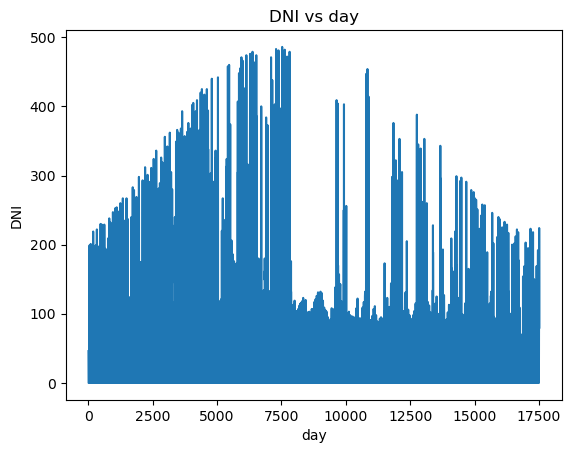

,Year,Month,Day,Hour,Minute,Temperature,DHI,GHI,DNI,Relative Humidity,Pressure,Wind Speed,Wind Direction,Solar Zenith Angle,Fill Flag,source_file,datetime
0,1998,1,1,0,0,18.3,46,89,302,48.07,997,0.7,231,81.77,0,178586_36.73_-119.78_1998.csv,1998-01-01
1,1998,1,1,0,30,17.5,21,35,237,50.54,997,0.7,241,86.61,0,178586_36.73_-119.78_1998.csv,1998-01-01
2,1998,1,1,1,0,16.8,0,0,0,47.84,997,0.8,251,92.04,0,178586_36.73_-119.78_1998.csv,1998-01-01
3,1998,1,1,1,30,16.4,0,0,0,49.07,997,0.9,257,97.47,0,178586_36.73_-119.78_1998.csv,1998-01-01
4,1998,1,1,2,0,16.0,0,0,0,48.80,998,0.9,264,103.07,0,178586_36.73_-119.78_1998.csv,1998-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437995,2022,12,31,21,30,13.9,29,29,0,91.35,986,4.7,178,63.22,0,178586_36.73_-119.78_2022.csv,2022-12-31
437996,2022,12,31,22,0,13.7,17,17,0,91.39,985,4.7,176,65.87,0,178586_36.73_-119.78_2022.csv,2022-12-31
437997,2022,12,31,22,30,13.5,17,17,0,92.58,985,4.8,176,69.14,0,178586_36.73_-119.78_2022.csv,2022-12-31
437998,2022,12,31,23,0,13.3,13,13,0,92.14,985,4.9,176,72.93,0,178586_36.73_-119.78_2022.csv,2022-12-31


In [272]:

plt.plot(weather.index[:17520], weather.head(17520)['DHI'])

plt.xlabel('day')
plt.ylabel('DNI')
plt.title('DNI vs day')
plt.show()
weather

In [273]:
weather['datetime'] = pd.to_datetime(weather['datetime']) + \
                     pd.to_timedelta(weather['Hour'], unit='h') + \
                     pd.to_timedelta(weather['Minute'], unit='m')
weather.set_index('datetime', inplace=True)

weather.describe()

,Year,Month,Day,Hour,Minute,Temperature,DHI,GHI,DNI,Relative Humidity,Pressure,Wind Speed,Wind Direction,Solar Zenith Angle,Fill Flag
count,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000
mean,2010.000000,6.526027,15.720548,11.500000,15.000000,18.983366,57.039228,223.268098,274.183180,47.404644,995.680824,1.825236,277.342201,89.686389,2.163454
std,7.211111,3.447855,8.796257,6.922194,15.000017,9.555757,76.565635,310.789343,355.059814,24.241119,4.624567,0.966490,65.323688,37.768318,12.311104
min,1998.000000,1.000000,1.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,2.900000,959.000000,0.200000,0.000000,13.280000,0.000000
25%,2004.000000,4.000000,8.000000,5.750000,0.000000,11.400000,0.000000,0.000000,0.000000,26.280000,992.000000,1.100000,269.000000,59.480000,0.000000
50%,2010.000000,7.000000,16.000000,11.500000,15.000000,17.800000,3.000000,3.000000,0.000000,45.760000,995.000000,1.600000,300.000000,89.220000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,25.400000,104.000000,424.000000,642.000000,67.330000,999.000000,2.300000,316.000000,120.062500,0.000000
max,2022.000000,12.000000,31.000000,23.000000,30.000000,47.700000,492.000000,1077.000000,1006.000000,100.000000,1015.000000,9.000000,360.000000,166.710000,100.000000


                     apparent_zenith      zenith  apparent_elevation  \
datetime                                                               
1998-01-01 00:00:00        81.764477   81.869015            8.235523   
1998-01-01 00:30:00        86.611110   86.823727            3.388890   
1998-01-01 01:00:00        92.038494   92.038494           -2.038494   
1998-01-01 01:30:00        97.466375   97.466375           -7.466375   
1998-01-01 02:00:00       103.067468  103.067468          -13.067468   
...                              ...         ...                 ...   
2022-12-31 21:30:00        63.228106   63.260672           26.771894   
2022-12-31 22:00:00        65.874158   65.910791           24.125842   
2022-12-31 22:30:00        69.139072   69.181994           20.860928   
2022-12-31 23:00:00        72.935708   72.988662           17.064292   
2022-12-31 23:30:00        77.178655   77.249036           12.821345   

                     elevation     azimuth  equation_of_time  


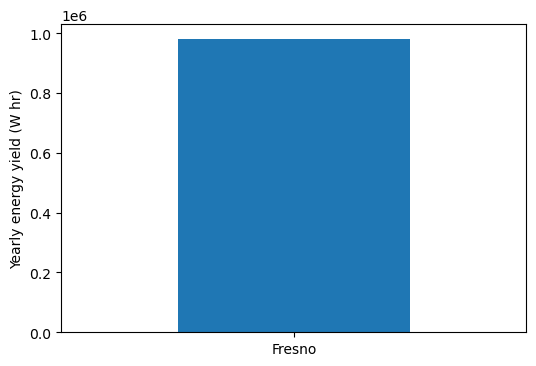

In [274]:
system = {'module': module, 'inverter': inverter,
          'surface_azimuth': 180}

energies = {}



system['surface_tilt'] = latitude
solpos = pvlib.solarposition.get_solarposition(
    time=weather.index,
    latitude=latitude,
    longitude=longitude,
    altitude=altitude,
    temperature=weather["Temperature"],
    pressure=pvlib.atmosphere.alt2pres(altitude),
)
print(solpos)
dni_extra = pvlib.irradiance.get_extra_radiation(weather.index)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
aoi = pvlib.irradiance.aoi(
    system['surface_tilt'],
    system['surface_azimuth'],
    solpos["apparent_zenith"],
    solpos["azimuth"],
)


    
total_irradiance = pvlib.irradiance.get_total_irradiance(
    system['surface_tilt'],
    system['surface_azimuth'],
    solpos['apparent_zenith'],
    solpos['azimuth'],
    weather['DNI'],
    weather['GHI'],
    weather['DHI'],
    dni_extra=dni_extra,
    model='haydavies',
)

cell_temperature = pvlib.temperature.sapm_cell(
    total_irradiance['poa_global'],
    weather["Temperature"],
    weather["Wind Speed"],
    **temperature_model_parameters,
)
effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
    total_irradiance['poa_direct'],
    total_irradiance['poa_diffuse'],
    am_abs,
    aoi,
    module,
)
dc = pvlib.pvsystem.sapm(effective_irradiance, cell_temperature, module)
ac = pvlib.inverter.sandia(dc['v_mp'], dc['p_mp'], inverter)
annual_energy = ac.sum() / len(weather.index.year.unique())
energies[name] = annual_energy

energies = pd.Series(energies)

# based on the parameters specified above, these are in W*hrs
print(energies)

energies.plot(kind='bar', rot=0)
plt.ylabel('Yearly energy yield (W hr)')
plt.gcf().set_size_inches(6, 4)  # Set the figure size (width, height)
plt.savefig('proc-energies.png')
plt.show()
plt.close()

C:\Users\naoki\AppData\Local\Temp\ipykernel_4144\917274351.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(weather.index[17000],ac[17000])


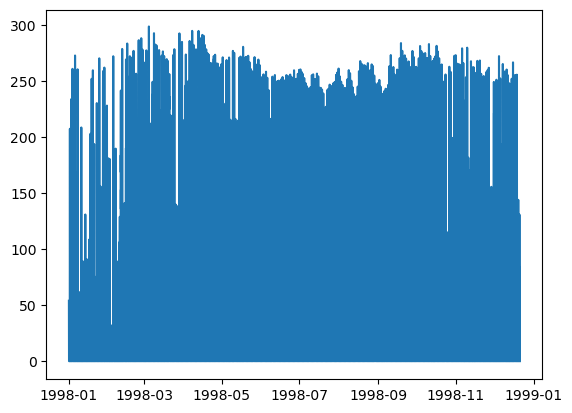

In [275]:
year_mean = pd.DataFrame(dc, index = weather.index)


plt.plot(year_mean['p_mp'][:17000])
plt.plot(weather.index[17000],ac[17000])


In [276]:
year_mean

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
datetime,,,,,,,
1998-01-01 00:00:00,1.125026,1.045062,63.140042,51.615581,53.941480,NaN,NaN
1998-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1998-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1998-01-01 01:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1998-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-31 21:30:00,0.156532,0.146206,59.045312,44.329732,6.481260,NaN,NaN
2022-12-31 22:00:00,0.092043,0.085992,57.463019,40.975430,3.523567,NaN,NaN
2022-12-31 22:30:00,0.092484,0.086414,57.526447,41.066341,3.548719,NaN,NaN


In [277]:


year_mean_y = year_mean.groupby(year_mean.index.year).sum()
year_month_mean = year_mean.groupby([year_mean.index.year, year_mean.index.month]).sum()



,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,0.0,0.0
mean,1.417531,1.301739,28.738032,22.988926,65.455344,NaN,NaN
std,2.014229,1.845158,31.067104,24.926615,92.239755,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,2.789896,2.575243,62.176316,49.983271,134.194343,NaN,NaN
max,6.419438,5.894070,67.937415,55.966950,305.244244,NaN,NaN


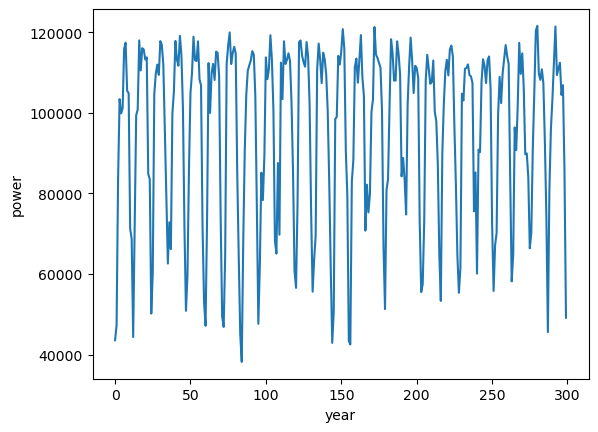

In [278]:

plt.plot(range(len(year_month_mean)), year_month_mean['p_mp'])
plt.xlabel('year')
plt.ylabel('power')

year_mean.describe()

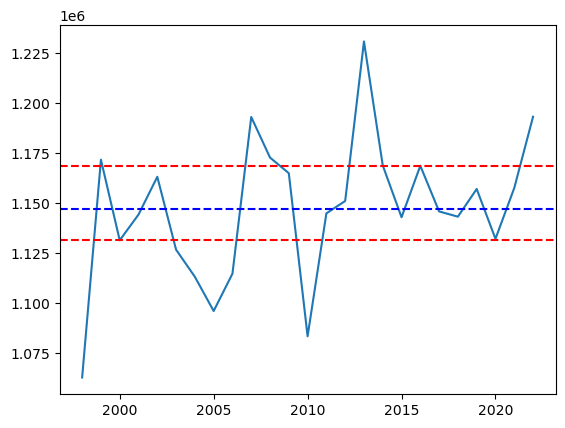

In [ ]:
plt.plot( year_mean_y['p_mp'])

plt.axhline(y=year_mean_y['p_mp'].mean(), color='b', linestyle='--', label='Mean')
plt.axhline(y= np.percentile(year_mean_y['p_mp'], 25), color='r', linestyle='--', label='25%')


In [280]:
year_mean_y.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.0,25.0
mean,24835.140378,22806.474071,503490.322506,402765.983233,1.146778e+06,0.0,0.0
std,809.151879,737.158060,1039.724288,979.088756,3.598477e+04,0.0,0.0
min,22842.173921,21002.016906,501347.425668,400931.203412,1.062715e+06,0.0,0.0
25%,24469.126043,22474.736789,503005.510478,402359.413222,1.131240e+06,0.0,0.0
50%,24840.618135,22803.107697,503475.400950,402894.376613,1.145640e+06,0.0,0.0
75%,25277.746788,23223.437794,503986.545821,403198.642904,1.168435e+06,0.0,0.0
max,26640.278229,24461.131759,505948.559688,405162.973613,1.230524e+06,0.0,0.0


In [281]:
np.percentile(year_mean_y['p_mp'], 25)

np.float64(1131239.5373531966)

In [282]:
x_values = (year_mean_y['p_mp'])  
x = np.array(x_values)

pct25 = np.percentile(year_mean_y['p_mp'], 25)

period_below_threshold = x < pct25
payments = np.where(period_below_threshold, pct25 - x, 0)

expected_value = np.mean(payments)
print(expected_value)

7658.125128803225


<Axes: xlabel='datetime'>

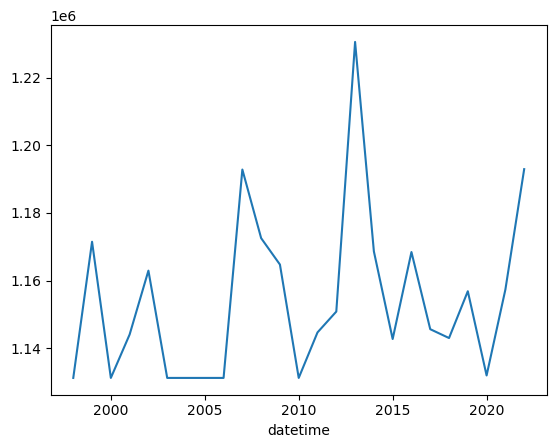

In [283]:
year_mean_y['payments'] = np.add(year_mean_y['p_mp'], payments)
year_mean_y['payments'].plot()  



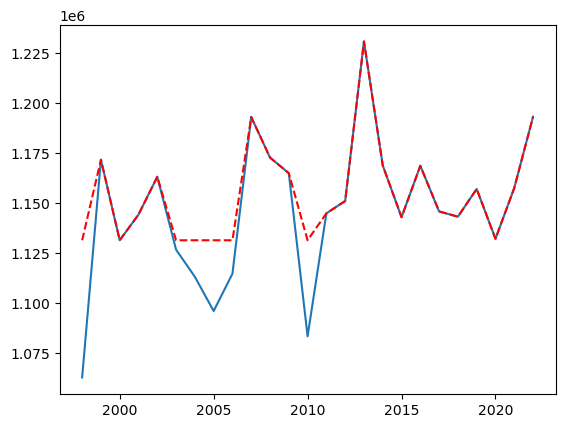

In [288]:
plt.plot( year_mean_y['p_mp'], label = 'before pay')
plt.plot(year_mean_y['payments'], label='Line 2', color='red', linestyle='--')


In [290]:
year_mean_y['payments'].sum() / len(year_mean_y)

np.float64(1154435.754026416)

In [291]:
len(year_mean_y)

25

In [292]:
year_mean_y['payments'].sum()

np.float64(28860893.850660402)